In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
fruits = pd.Series(["kiwi", "mango", "strawberry", "pineapple", "gala apple", "honeycrisp apple", "tomato", "watermelon", "honeydew", "kiwi", "kiwi", "kiwi", "mango", "blueberry", "blackberry", "gooseberry", "papaya"])

In [321]:
#Describing our series
fruits.describe()

count       17
unique      13
top       kiwi
freq         4
dtype: object

In [322]:
#Get the unique fruit names
# to get the unique fruit names we can use the function .unique(). This outputs the unique values within the series
fruits.unique()

array(['kiwi', 'mango', 'strawberry', 'pineapple', 'gala apple',
       'honeycrisp apple', 'tomato', 'watermelon', 'honeydew',
       'blueberry', 'blackberry', 'gooseberry', 'papaya'], dtype=object)

In [4]:
#Determine how many times each value occurs in the series
    # to determine how many times each value occurs we can use .value_counts() function, it produces all the unique
    # values and their count
fruits.value_counts().head(1)

kiwi    4
dtype: int64

In [324]:
#e. Determine the most frequently occurring fruit name from the series.
fruits.mode()

0    kiwi
dtype: object

In [7]:
#f Determine the least frequently occurring fruit name from the series.
fruits.value_counts().nsmallest(n = 13, keep = "first")

tomato              1
papaya              1
blueberry           1
blackberry          1
gooseberry          1
pineapple           1
gala apple          1
honeydew            1
watermelon          1
honeycrisp apple    1
strawberry          1
mango               2
kiwi                4
dtype: int64

In [9]:
#g. Write the code to get the longest string from the fruits series.
fruits[fruits.str.len() == max(fruits.str.len())] # equating the len of fruit to see if it is equal to the max length and then indexing


5    honeycrisp apple
dtype: object

In [160]:
#h.Find the fruit(s) with 5 or more letters in the name.
fruits[fruits.str.len() >= 5] # indexing the series with a conditional that checks to see if the len is greater than equal to 5

1                mango
2           strawberry
3            pineapple
4           gala apple
5     honeycrisp apple
6               tomato
7           watermelon
8             honeydew
12               mango
13           blueberry
14          blackberry
15          gooseberry
16              papaya
dtype: object

In [161]:
#i. Capitalize all the fruit strings in the series.
fruits.str.capitalize() # using the str function .capitalize() to capitalize the name of the fruits in series

0                 Kiwi
1                Mango
2           Strawberry
3            Pineapple
4           Gala apple
5     Honeycrisp apple
6               Tomato
7           Watermelon
8             Honeydew
9                 Kiwi
10                Kiwi
11                Kiwi
12               Mango
13           Blueberry
14          Blackberry
15          Gooseberry
16              Papaya
dtype: object

In [162]:
#j. Count the letter "a" in all the fruits (use string vectorization)
fruits.str.count("a") # this will output the number of a's in each fruit whereas the code with .sum will
#add the count to get the total count of a's
fruits.str.count('a').sum()

14

In [163]:
#k.Output the number of vowels in each and every fruit.
def count_vowels(fruit):
    vowels = ('aeiou')    
    count = 0
    for letter in fruit:
        if letter.lower() in vowels:
            count += 1
    return count

# first we created a function that counts the number of vowels in a fruit
# then we applied that function to the series using the .apply(function_name)

fruits.apply(count_vowels)

0     2
1     2
2     2
3     4
4     4
5     5
6     3
7     4
8     3
9     2
10    2
11    2
12    2
13    3
14    2
15    4
16    3
dtype: int64

In [164]:
#l Use the .apply method and a lambda function to find the fruit(s) containing two or more "o" letters in the name.
fruits[fruits.apply(lambda fruit: fruit.count("o")>= 2 )] # creating a lamda function that counts the number of o's
                                                            # indexing  by applying the lambda function



6         tomato
15    gooseberry
dtype: object

In [10]:
#m.Write the code to get only the fruits containing "berry" in the name

# def get_fruit(fruits):
#     word = ('berry')
#     for fruit in fruits:
#         if word in fruit:
#             return fruit


fruits[fruits.apply(lambda fruit: 'berry' in fruit)] # first checking to see if berry is contained in the fruit name
                                                    # using a lambda function, and then indexing it

fruits[fruits.str.contains('berry')]    # another approach using st.contains

2     strawberry
13     blueberry
14    blackberry
15    gooseberry
dtype: object

In [166]:
#n. Write the code to get only the fruits containing "apple" in the name
# first checking to see if apple is contained in the fruit name
# using a lambda function, and then indexing it

fruits[fruits.apply(lambda fruit: 'apple' in fruit)] 


3           pineapple
4          gala apple
5    honeycrisp apple
dtype: object

In [204]:
#o. Which fruit has the highest amount of vowels?
# we have previously created a function that counts vowels in each fruit, we are using that function with max 
#function to index the fruit with the maximum number of vowel

fruits[fruits.apply(count_vowels).max()] 
#fruits[max(fruits.str.count('[aeiou]'))]

'honeycrisp apple'

In [12]:
#2. Use pandas to create a Series from the following data:
my_series = pd.Series(['$796,459.41', '$278.60', '$482,571.67', '$4,503,915.98', '$2,121,418.3', '$1,260,813.3', '$87,231.01', '$1,509,175.45', '$4,138,548.00', '$2,848,913.80', '$594,715.39', '$4,789,988.17', '$4,513,644.5', '$3,191,059.97', '$1,758,712.24', '$4,338,283.54', '$4,738,303.38', '$2,791,759.67', '$769,681.94', '$452,650.23'])
my_series
# we can also chain all of these together as an another approach to solve this problem
# the data type of my_series is object.
temp_series = my_series.str.replace("$", "") # replacing the $ sign with nothing
new_series = temp_series.str.replace(",", "") # replacing the commas with nothing
# converting it to a float data type
new_series = new_series.astype(float)
new_series.min() # getting the minimum value
new_series.max() # getting the maximum value


4789988.17

In [15]:
#Bin the data into 4 equally sized intervals and show how many values fall into each bin.
# we use the .cut function to cut the series and gave 4 as an argument because we want 4 equal bins, then we used
# the .value_counts() function to get the number of values for bin
new_data_series = pd.cut(new_series, 4).value_counts().sort_index()
new_data_series

(-4511.11, 1197705.993]       7
(1197705.993, 2395133.385]    4
(2395133.385, 3592560.778]    3
(3592560.778, 4789988.17]     6
dtype: int64

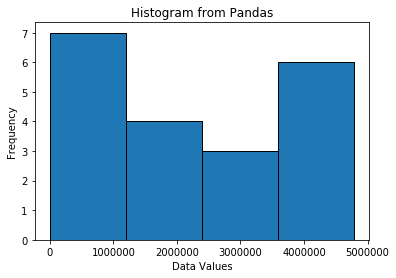

In [22]:
#Plot a histogram of the data. Be sure to include a title and axis labels.
plt.hist(new_series, bins = 4, ec = 'black')
# plt.bar(new_series, width = .9)
plt.xlabel("Data Values")
plt.ylabel("Frequency")
plt.title("Histogram from Pandas")
plt.show()

In [17]:
#3. Use pandas to create a Series from the following exam scores:
scores = pd.Series([60, 86, 75, 62, 93, 71, 60, 83, 95, 78, 65, 72, 69, 81, 96, 80, 85, 92, 82, 78])
scores

0     60
1     86
2     75
3     62
4     93
5     71
6     60
7     83
8     95
9     78
10    65
11    72
12    69
13    81
14    96
15    80
16    85
17    92
18    82
19    78
dtype: int64

In [18]:
#What is the minimum exam score? The max, mean, median?

# here we are using the function min, max, median, to get the asked value
{
    'minimum score': scores.min(),
    'maximum score': scores.max(),
    'mean score': scores.mean(),
    'median score': scores.median()
}

{'minimum score': 60,
 'maximum score': 96,
 'mean score': 78.15,
 'median score': 79.0}

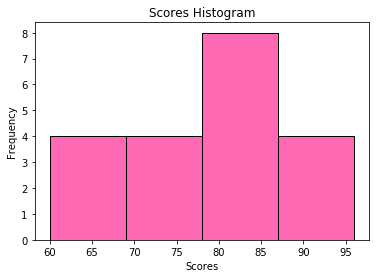

In [23]:
#Plot a histogram of the scores.
#using the plt function from matplotlib to create a histogram with 8 bins

plt.hist(scores, bins = 4,color = 'hotpink', ec = 'black')
# plt.plot(scores)
plt.xlabel("Scores")
plt.ylabel('Frequency')
plt.title("Scores Histogram")
plt.show()

In [271]:
#Convert each of the numbers above into a letter grade. For example, 86 should be a 'B' and 95 should be an 'A'.
scores.apply(lambda score: "A" if score >= 90 else "B" if score >= 80 else "C" if score >= 70 else "D" if score >= 60 else "F")
# used the lambda function to create an interval of grades and assigned letter grade to them



# scores.apply(lambda score: pd.concat(score,"A") if score >= 90 else pd.concat(score,"B") if score >= 80 else pd.concat(score,"C") if score >= 70 else pd.concat(score,"D") if score >= 60 else pd.concat(score,"F"))
# scores_with_grades = pd.cut(scores, [0,60,70,80,90,100], labels= ["F", "D", "C", "B", "A"])
# plt.hist(scores_with_grades)
# plt.xlabel("Students letter Grade")

0     D
1     B
2     C
3     D
4     A
5     C
6     D
7     B
8     A
9     C
10    D
11    C
12    D
13    B
14    A
15    B
16    B
17    A
18    B
19    C
dtype: object

In [252]:
#Write the code necessary to implement a curve. I.e. that grade closest to 100 should be converted to a 100,
#and that many points should be given to every other score as well.
new_curved_score = scores + (100- scores.max())
new_curved_score


0      64
1      90
2      79
3      66
4      97
5      75
6      64
7      87
8      99
9      82
10     69
11     76
12     73
13     85
14    100
15     84
16     89
17     96
18     86
19     82
dtype: int64

In [25]:
#4. Use pandas to create a Series from the following string:
# first we convert the string to list of strings and than to series
str_series = pd.Series (list('hnvidduckkqxwymbimkccexbkmqygkxoyndmcxnwqarhyffsjpsrabtjzsypmzadfavyrnndndvswreauxovncxtwzpwejilzjrmmbbgbyxvjtewqthafnbkqplarokkyydtubbmnexoypulzwfhqvckdpqtpoppzqrmcvhhpwgjwupgzhiofohawytlsiyecuproguy'))
                        
str_series
str_series.value_counts()

y    13
p    12
w    10
k     9
b     9
n     9
m     9
c     8
q     8
o     8
d     8
r     8
a     8
h     8
x     8
v     7
t     7
u     7
z     7
j     6
f     6
e     6
g     5
i     5
s     5
l     4
dtype: int64

In [29]:
#What is the most frequently occuring letter? Least frequently occuring?
# we are using the nlargest and n smallest to get the frequently occuring letter and least frequently occuring letter
str_series.value_counts().nlargest(n = 1, keep='all')
str_series.value_counts().nsmallest(n = 1,keep= 'all')

l    4
dtype: int64

In [310]:
# How many vowels are in the series?

# first counting the number of vowels and then using the sum fuction to get the total count

str_series.str.count('[aeiou]').sum()

34

In [359]:
#How many consonants are in the list? 

    # subtracting the sum total of the vowel count and subtracting it from the total count sum

str_series.count().sum()-str_series.str.count('[aeiou]').sum()

166

In [31]:
#Create a series that has all of the same letters, but uppercased
str_series.str.upper()



0      H
1      N
2      V
3      I
4      D
      ..
195    R
196    O
197    G
198    U
199    Y
Length: 200, dtype: object

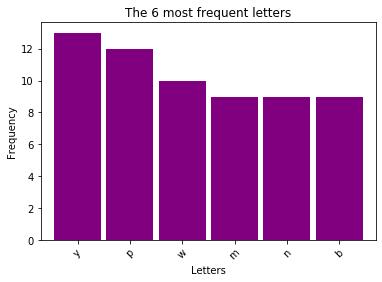

In [362]:
#Create a bar plot of the frequencies of the 6 most frequently occuring letters.
str_series.value_counts().head(6).plot.bar(color = 'purple', width = 0.9)
plt.title("The 6 most frequent letters")
plt.xlabel("Letters")
plt.xticks(rotation = 45)
plt.ylabel("Frequency")
plt.show()